In [136]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import urllib3 as urllib
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.metrics.pairwise import cosine_similarity

In [137]:
df = pd.read_csv("final_book_dataset.csv", encoding='ISO-8859-1')
df.shape

(9522, 27)

In [138]:
df.head()

,Unnamed: 0,id,title,isbn,isbn13,country_code,image_url,small_image_url,publication_year,publication_month,...,work_rating_dist,average_rating,num_pages,format,edition_information,ratings_count,text_reviews_count,url,link,genre
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,439785960,9.780000e+12,GB,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,2006.0,9.0,...,5:1162549|4:459309|3:136413|2:21524|1:7313|tot...,4.54,652.0,Paperback,NaN,1680064,22133,https://www.goodreads.com/book/show/1.Harry_Po...,https://www.goodreads.com/book/show/1.Harry_Po...,"['fantasy', 'young-adult', 'fiction']"
1,1,2,Harry Potter and the Order of the Phoenix (Har...,439358078,9.780000e+12,GB,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...,2004.0,8.0,...,5:1125716|4:494730|3:180301|2:31584|1:9536|tot...,4.46,870.0,Paperback,NaN,1736469,22972,https://www.goodreads.com/book/show/2.Harry_Po...,https://www.goodreads.com/book/show/2.Harry_Po...,"['fantasy', 'children', 'fiction']"
2,2,3,Harry Potter and the Sorcerer's Stone (Harry P...,439554934,9.780000e+12,GB,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,1997.0,6.0,...,5:3015593|4:1157556|3:455382|2:101749|1:75637|...,4.44,320.0,Hardcover,NaN,4607944,58024,https://www.goodreads.com/book/show/3.Harry_Po...,https://www.goodreads.com/book/show/3.Harry_Po...,"['fantasy', 'young-adult', 'fiction']"
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,043965548X,9.780000e+12,GB,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...,2004.0,5.0,...,5:1267999|4:509806|3:166202|2:20419|1:6721|tot...,4.53,435.0,Mass Market Paperback,NaN,1834350,27646,https://www.goodreads.com/book/show/5.Harry_Po...,https://www.goodreads.com/book/show/5.Harry_Po...,"['fantasy', 'young-adult', 'fiction']"
4,4,6,Harry Potter and the Goblet of Fire (Harry Pot...,439139600,9.780000e+12,GB,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...,2002.0,9.0,...,5:1196275|4:495237|3:151874|2:20219|1:6682|tot...,4.53,752.0,Paperback,First Scholastic Trade Paperback Edition,1754447,24488,https://www.goodreads.com/book/show/6.Harry_Po...,https://www.goodreads.com/book/show/6.Harry_Po...,"['fantasy', 'young-adult', 'fiction']"


In [139]:
df.columns.values

array(['Unnamed: 0', 'id', 'title', 'isbn', 'isbn13', 'country_code',
       'image_url', 'small_image_url', 'publication_year',
       'publication_month', 'publication_day', 'publisher',
       'language_code', 'is_ebook', 'description', 'work_original_title',
       'work_media_type', 'work_rating_dist', 'average_rating',
       'num_pages', 'format', 'edition_information', 'ratings_count',
       'text_reviews_count', 'url', 'link', 'genre'], dtype=object)

# Book description — Word count distribution

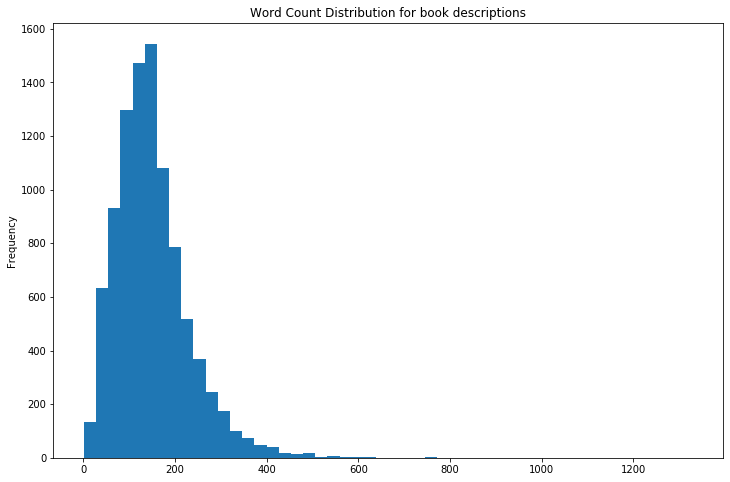

In [140]:
# Calculating the word count for book description
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

# Book description — Word count distribution

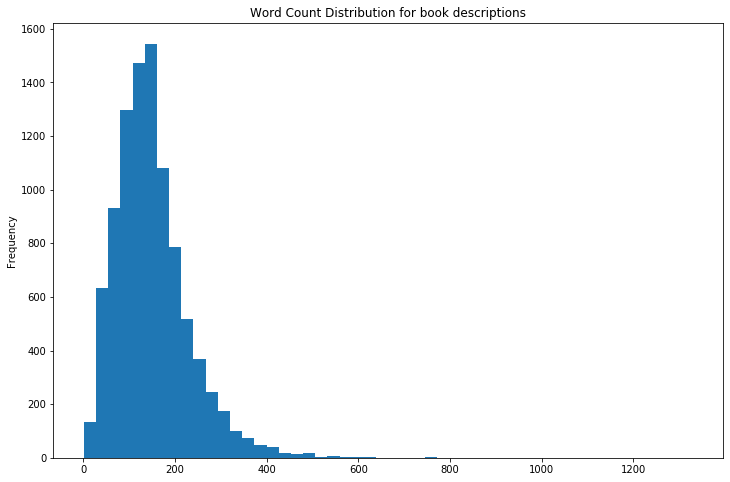

In [141]:
# Calculating the word count for book description
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

# The distribution of top part-of-speech tags in the book descriptions

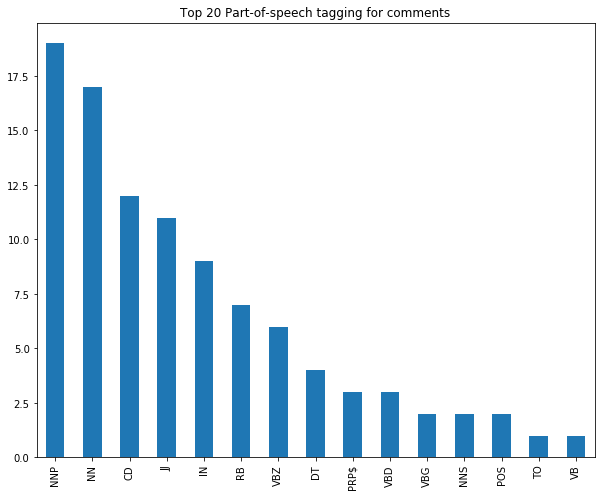

In [142]:
from textblob import TextBlob
blob = TextBlob(str(df['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

In [143]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in str(s) if ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['description'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

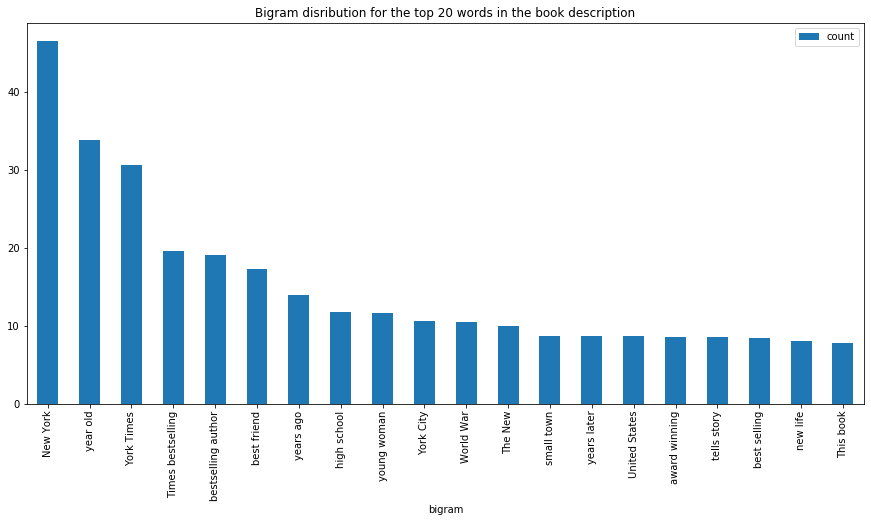

In [144]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['description'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

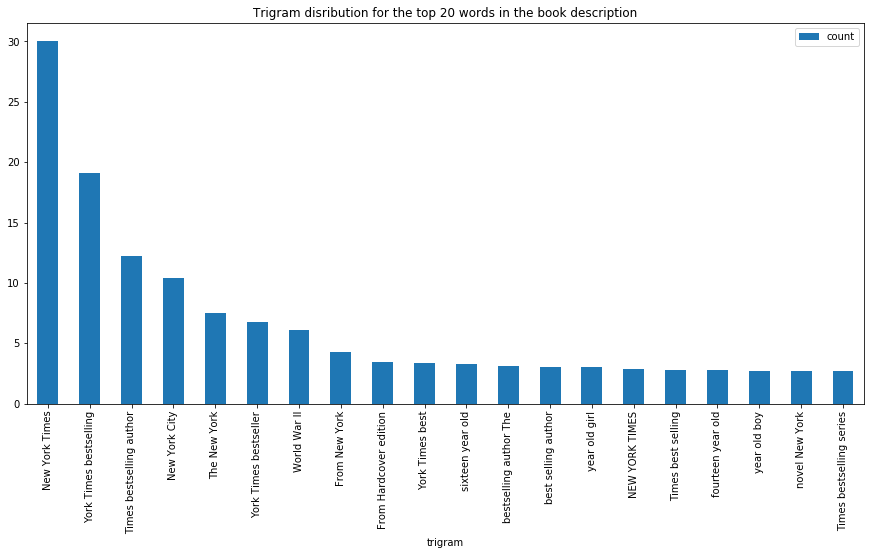

In [145]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['description'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [146]:
from math import*
 
def square_rooted(x):
 
    return round(sqrt(sum([a*a for a in x])),3)

# Recommendation based on the book title

In [147]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'].str.contains(genre)]
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book title into vectors (used bigram)
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwise similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]
# Book indicies
    book_indices = [i[0] for i in sig]
    rec = data[['title', 'image_url']].iloc[book_indices]
   
    # Top 5 book recommendation

    for index, row in rec.iterrows():
        response = requests.get(row['image_url'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])

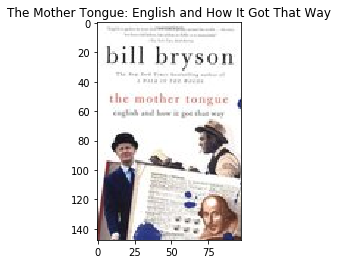

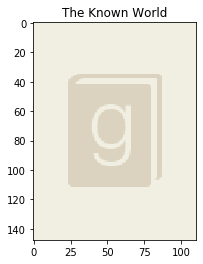

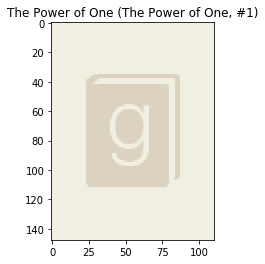

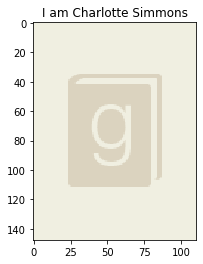

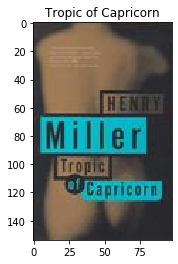

In [148]:
recommend("All the Light We Cannot See", "history")

# Recommendation based on book description

In [149]:
# Function for recommending books based on Book title. It takes book title and genre as an input.def recommend(title, genre):
def recommend_desc(title, genre):
    global rec
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'].str.contains(genre)]
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# Book indicies
    book_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'image_url']].iloc[book_indices]
#     It reads the top 5 recommend book url and print the images
    
    for index, row in rec.iterrows():
        response = requests.get(row['image_url'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])

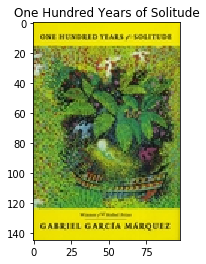

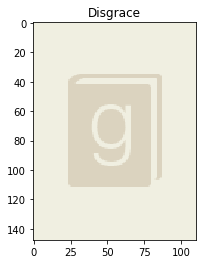

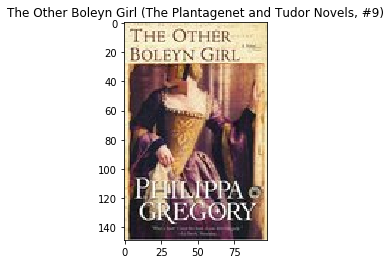

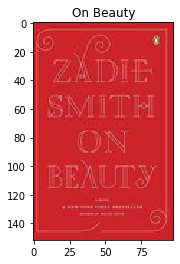

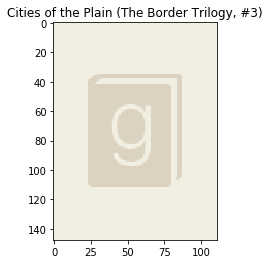

In [152]:
recommend_desc("The Last Boleyn", "history")